In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import random 
import matplotlib.pyplot as plt
%matplotlib inline 

random.seed(2019)

In [2]:

def create_box(ori_1, ori_2, linear, bw):
    if ori_1 == 'v1':
        grid = torch.tensor([[0.4,0,0],[0.4,0,0],[0.4,0,0]])
    elif ori_1 == 'v2':
        grid = torch.tensor([[0,0.4,0],[0,0.4,0],[0,0.4,0]])
    elif ori_1 == 'v3':
        grid = torch.tensor([[0,0,0.4],[0,0,0.4],[0,0,0.4]])
    elif ori_1 == 'd1':
        grid = torch.tensor([[0,0,0.4],[0,0.4,0],[0.4,0,0]])
    elif ori_1 == 'h1':
        grid = torch.tensor([[0.4,0.4,0.4],[0,0,0],[0,0,0]])
    elif ori_1 == 'h2':
        grid = torch.tensor([[0,0,0],[0.4,0.4,0.4],[0,0,0]])
    elif ori_1 == 'h3':
        grid = torch.tensor([[0,0,0],[0,0,0],[0.4,0.4,0.4]])
    elif ori_1 == 'd2':
        grid = torch.tensor([[0.4,0,0],[0,0.4,0],[0,0,0.4]])

    if linear == True:
        if ori_2 == 'v1':
            grid = grid + torch.tensor([[0.6,0,0],[0.6,0,0],[0.6,0,0]])
        elif ori_2 == 'v2':
            grid = grid + torch.tensor([[0,0.6,0],[0,0.6,0],[0,0.6,0]])
        elif ori_2 == 'v3':
            grid = grid + torch.tensor([[0,0,0.6],[0,0,0.6],[0,0,0.6]])
        elif ori_2 == 'd1':
            grid = grid + torch.tensor([[0,0,0.6],[0,0.6,0],[0.6,0,0]])
        elif ori_2 == 'h1':
            grid = grid + torch.tensor([[0.6,0.6,0.6],[0,0,0],[0,0,0]])
        elif ori_2 == 'h2':
            grid = grid + torch.tensor([[0,0,0],[0.6,0.6,0.6],[0,0,0]])
        elif ori_2 == 'h3':
            grid = grid + torch.tensor([[0,0,0],[0,0,0],[0.6,0.6,0.6]])
        elif ori_2 == 'd2':
            grid = grid + torch.tensor([[0.6,0,0],[0,0.6,0],[0,0,0.6]])

    elif linear == False:
        if ori_2 == 'v1':
            grid = torch.max(grid, torch.tensor([[0.6,0,0],[0.6,0,0],[0.6,0,0]]))
        elif ori_2 == 'v2':
            grid = torch.max(grid, torch.tensor([[0,0.6,0],[0,0.6,0],[0,0.6,0]]))
        elif ori_2 == 'v3':
            grid = torch.max(grid, torch.tensor([[0,0,0.6],[0,0,0.6],[0,0,0.6]]))
        elif ori_2 == 'd1':
            grid = torch.max(grid,torch.torch.tensor([[0,0,0.6],[0,0.6,0],[0.6,0,0]]))
        elif ori_2 == 'h1':
            grid = torch.max(grid,torch.tensor([[0.6,0.6,0.6],[0,0,0],[0,0,0]]))
        elif ori_2 == 'h2':
            grid = torch.max(grid,torch.tensor([[0,0,0],[0.6,0.6,0.6],[0,0,0]]))
        elif ori_2 == 'h3':
            grid = torch.max(grid,torch.tensor([[0,0,0],[0,0,0],[0.6,0.6,0.6]]))
        elif ori_2 == 'd2':
            grid = torch.max(grid,torch.tensor([[0.6,0,0],[0,0.6,0],[0,0,0.6]]))
        
    grid= grid.view(1,3,3)
    
    if bw==False:
        grid = grid.view(3, 3, 1).expand(-1, -1, 3)
        
    return(grid)
        
        
    

In [3]:
def ori_to_oneohot(ori):
    if ori=='v1':
        return(torch.tensor([1,0,0,0,0,0,0,0]).unsqueeze(0))
    elif ori=='v2':
        return(torch.tensor([0,1,0,0,0,0,0,0]).unsqueeze(0))
    elif ori=='v3':
        return(torch.tensor([0,0,1,0,0,0,0,0]).unsqueeze(0))
    elif ori=='d1':
        return(torch.tensor([0,0,0,1,0,0,0,0]).unsqueeze(0))
    elif ori=='h1':
        return(torch.tensor([0,0,0,0,1,0,0,0]).unsqueeze(0))
    elif ori=='h2':
        return(torch.tensor([0,0,0,0,0,1,0,0]).unsqueeze(0))
    elif ori=='h3':
        return(torch.tensor([0,0,0,0,0,0,1,0]).unsqueeze(0))
    elif ori=='d2':
        return(torch.tensor([0,0,0,0,0,0,0,1]).unsqueeze(0))

In [4]:
ori_to_oneohot('v1').shape

torch.Size([1, 8])

In [5]:
class MyDataset_grid(Dataset):
    def __init__(self, train_gnrl, n_bars, linear, bw, len_train, len_gnrl):
        self.train_gnrl = train_gnrl
        self.linear = linear
        self.bw = bw
        self.n_bars = n_bars
        self.len_train = len_train
        self.len_gnrl = len_gnrl
    def __getitem__(self, index):
        
        oris_set = ['v1','v2','v3', 'd1', 'h1','h2','h3', 'd2']
        pairings = {'v1':'d1', 'd1':'v1','h2':'d2', 'd2':'h2', 'v3':'v2', 'v2':'v3', 'h1':'h3', 'h3':'h1'}
        characters = []
        if self.train_gnrl == 'train':
            for i in range(self.n_bars):
                characters.append(random.choices(oris_set, k=1)[0])
                oris_set.remove(pairings[characters[i]] )
                oris_set.remove(characters[i] )
        elif self.train_gnrl == 'gnrl':
            for i in range(self.n_bars):
                characters.append(random.choices(oris_set, k=1)[0])
                if i == 1:
                    break
                characters.append(pairings[characters[i]] )
        
        print(characters)
        if self.n_bars ==2:
            x_sample = torch.cat((ori_to_oneohot(characters[0]), ori_to_oneohot(characters[1])),1)
            
        y_sample = create_box(characters[0], characters[1], self.linear, self.bw )

        sample = {'x':x_sample, 'y':y_sample}
        return sample

    def __len__(self):
        if train_gnrl =='train':
            return self.len_train
        elif train_gnrl =='gnrl':
            return( self.len_gnrl)


In [6]:
grid_data_train = MyDataset_grid('train', 2, True, True, 100, 100)
grid_data_gnrl = MyDataset_grid('gnrl', 2, True, True, 100, 100)



['h3', 'h2']
['d2', 'v1']
['h2', 'h1']
['d2', 'h3']
['h3', 'd2']
['h3', 'd1']
['v3', 'h2']
['h3', 'v3']
['v1', 'h2']
['h2', 'v3']


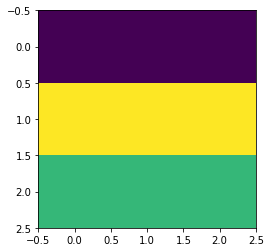

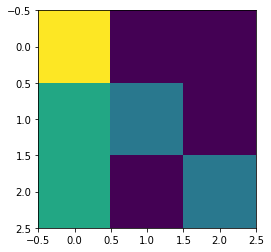

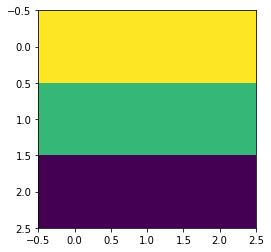

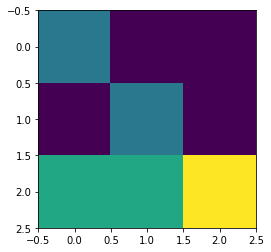

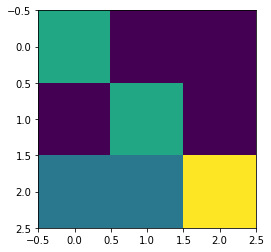

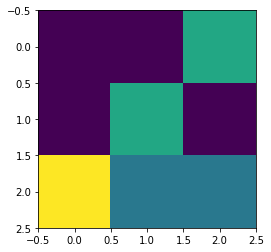

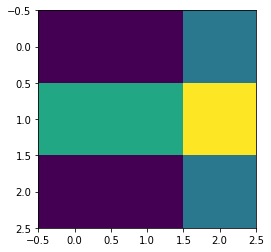

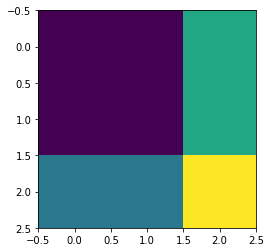

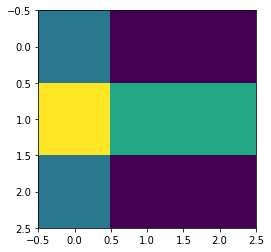

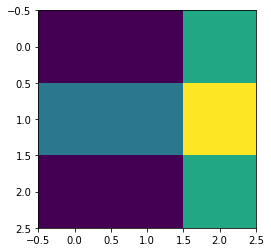

In [7]:
for i in range (10):
    sample = grid_data_train.__getitem__(i)
    x= sample['x']
    y = sample['y']
    plt.figure()
    plt.imshow(y[0,:,:])
